$$\textbf{Reconocimiento estadístico de Patrones. Proyecto 1: Análisis exploratorio}$$
$$\textit{Ramón Ruiz , Sarahi García}$$

In [51]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


import numpy as np
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns
from fasteda import fast_eda
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings 

In [52]:
#Path
carpeta = '/Users/ely/Documents/Maestria/segundo_semestre/cimat2023-1/patrones/Proyecto_1/datos/'
archivos = os.listdir(carpeta)
#lista para almacenar los nombres
productos = []
for archivo in archivos:
    if archivo.endswith('.CSV'):
        nombre_producto = os.path.splitext(archivo)[0] 
        productos.append(nombre_producto)

In [53]:
#cargamos un producto para crear un diccionario clave-ciudad
alquiler = pd.read_csv(carpeta+"alquiler.CSV")
clave=alquiler['Clave ciudad'].unique()
nombre=alquiler['Nombre ciudad'].unique()
diccionario_ciudades=dict(zip(clave, nombre))

In [54]:
#importamos la base con la que vamos a trabajar
df = pd.read_csv(carpeta+"base_productos.CSV")
df.head()

Anio  Mes  Clave ciudad  limon  leche  camaron  tortillas  electricidad  \
0  2018    8             1  33.68  19.00   175.00      14.00        417.35   
1  2018    8             2  14.23  16.58   178.00      16.00        192.79   
2  2018    8             3  13.75  16.00   135.00      11.50        417.35   
3  2018    8             4  20.40  11.17   322.00      10.05        417.35   
4  2018    8             5  20.68  15.47   225.48      16.00        192.79   

   alquiler  frijol  pollo  
0    100.24   33.89  80.75  
1    100.03   37.79  90.00  
2    100.08   32.78  81.00  
3    100.24   38.33  35.00  
4    100.16   43.89  59.24

Hay 55 ciudades distintas:

In [55]:
df['Clave ciudad'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55])

In [56]:
df.columns

Index(['Anio', 'Mes', 'Clave ciudad', 'limon', 'leche', 'camaron', 'tortillas',
       'electricidad', 'alquiler', 'frijol', 'pollo'],
      dtype='object')

Veamos un pequeño resumen de la variables continuas (los precios de cada producto)

DataFrame Head:


limon  leche  camaron  tortillas  electricidad  alquiler  frijol  pollo
0  33.68  19.00    175.0       14.0        417.35    100.24   33.89  80.75
1  14.23  16.58    178.0       16.0        192.79    100.03   37.79  90.00
2  13.75  16.00    135.0       11.5        417.35    100.08   32.78  81.00

DataFrame Tail:


limon  leche  camaron  tortillas  electricidad  alquiler  frijol  pollo
3682  35.00  23.00    324.0       24.5        540.59    116.90   39.14   68.0
3683  19.00  21.50    140.0       23.5        443.56    105.68   36.50   50.0
3684  36.75  18.89    225.0       20.0        540.59    111.03   43.33   80.0

----------------------------------------------------------------------------------------------------
Missing values:


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(3685, 8)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3685 entries, 0 to 3684
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   limon         3685 non-null   float64
 1   leche         3685 non-null   float64
 2   camaron       3685 non-null   float64
 3   tortillas     3685 non-null   float64
 4   electricidad  3685 non-null   float64
 5   alquiler      3685 non-null   float64
 6   frijol        3685 non-null   float64
 7   pollo         3685 non-null   float64
dtypes: float64(8)
memory usage: 230.4 KB
----------------------------------------------------------------------------------------------------
Describe DataFrame:



/Users/ely/Documents/Maestria/segundo_semestre/cimat2023-1/patrones/.conda/lib/python3.11/site-packages/fasteda/__init__.py:86: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  full_info.iloc[:,:-2] = full_info.iloc[:,:-2].applymap(lambda x: format(x, '.3f') \
/Users/ely/Documents/Maestria/segundo_semestre/cimat2023-1/patrones/.conda/lib/python3.11/site-packages/fasteda/__init__.py:92: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(color_negative_red, subset = info_cols)


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



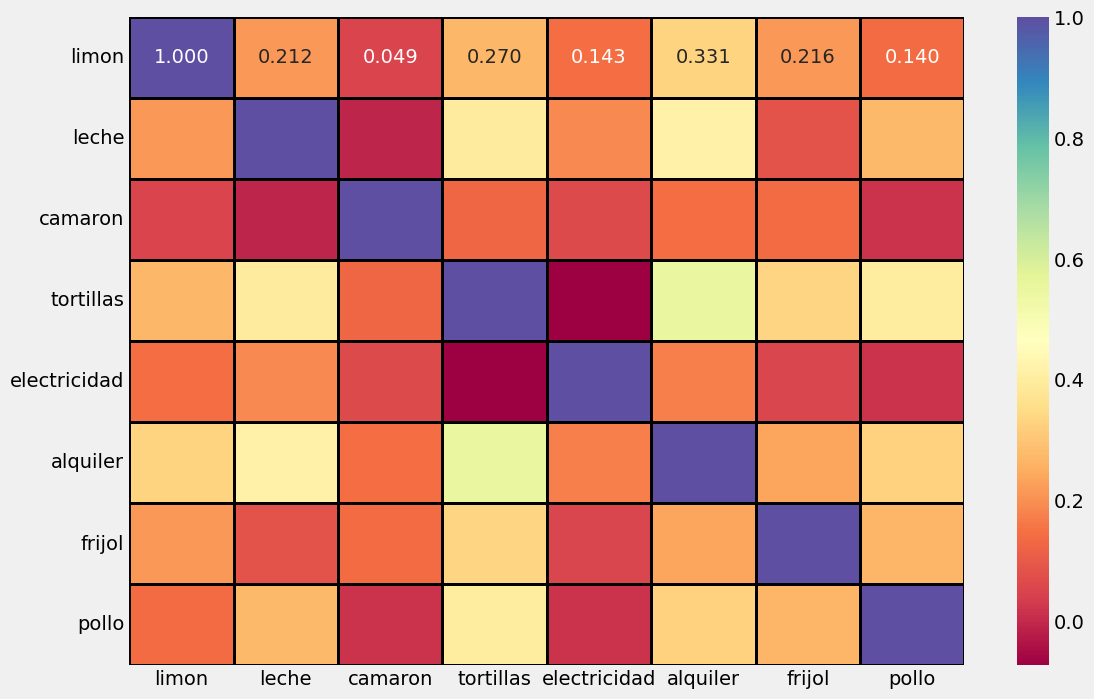

----------------------------------------------------------------------------------------------------
DataFrame Pairplot:



/Users/ely/Documents/Maestria/segundo_semestre/cimat2023-1/patrones/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ely/Documents/Maestria/segundo_semestre/cimat2023-1/patrones/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ely/Documents/Maestria/segundo_semestre/cimat2023-1/patrones/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ely/Document

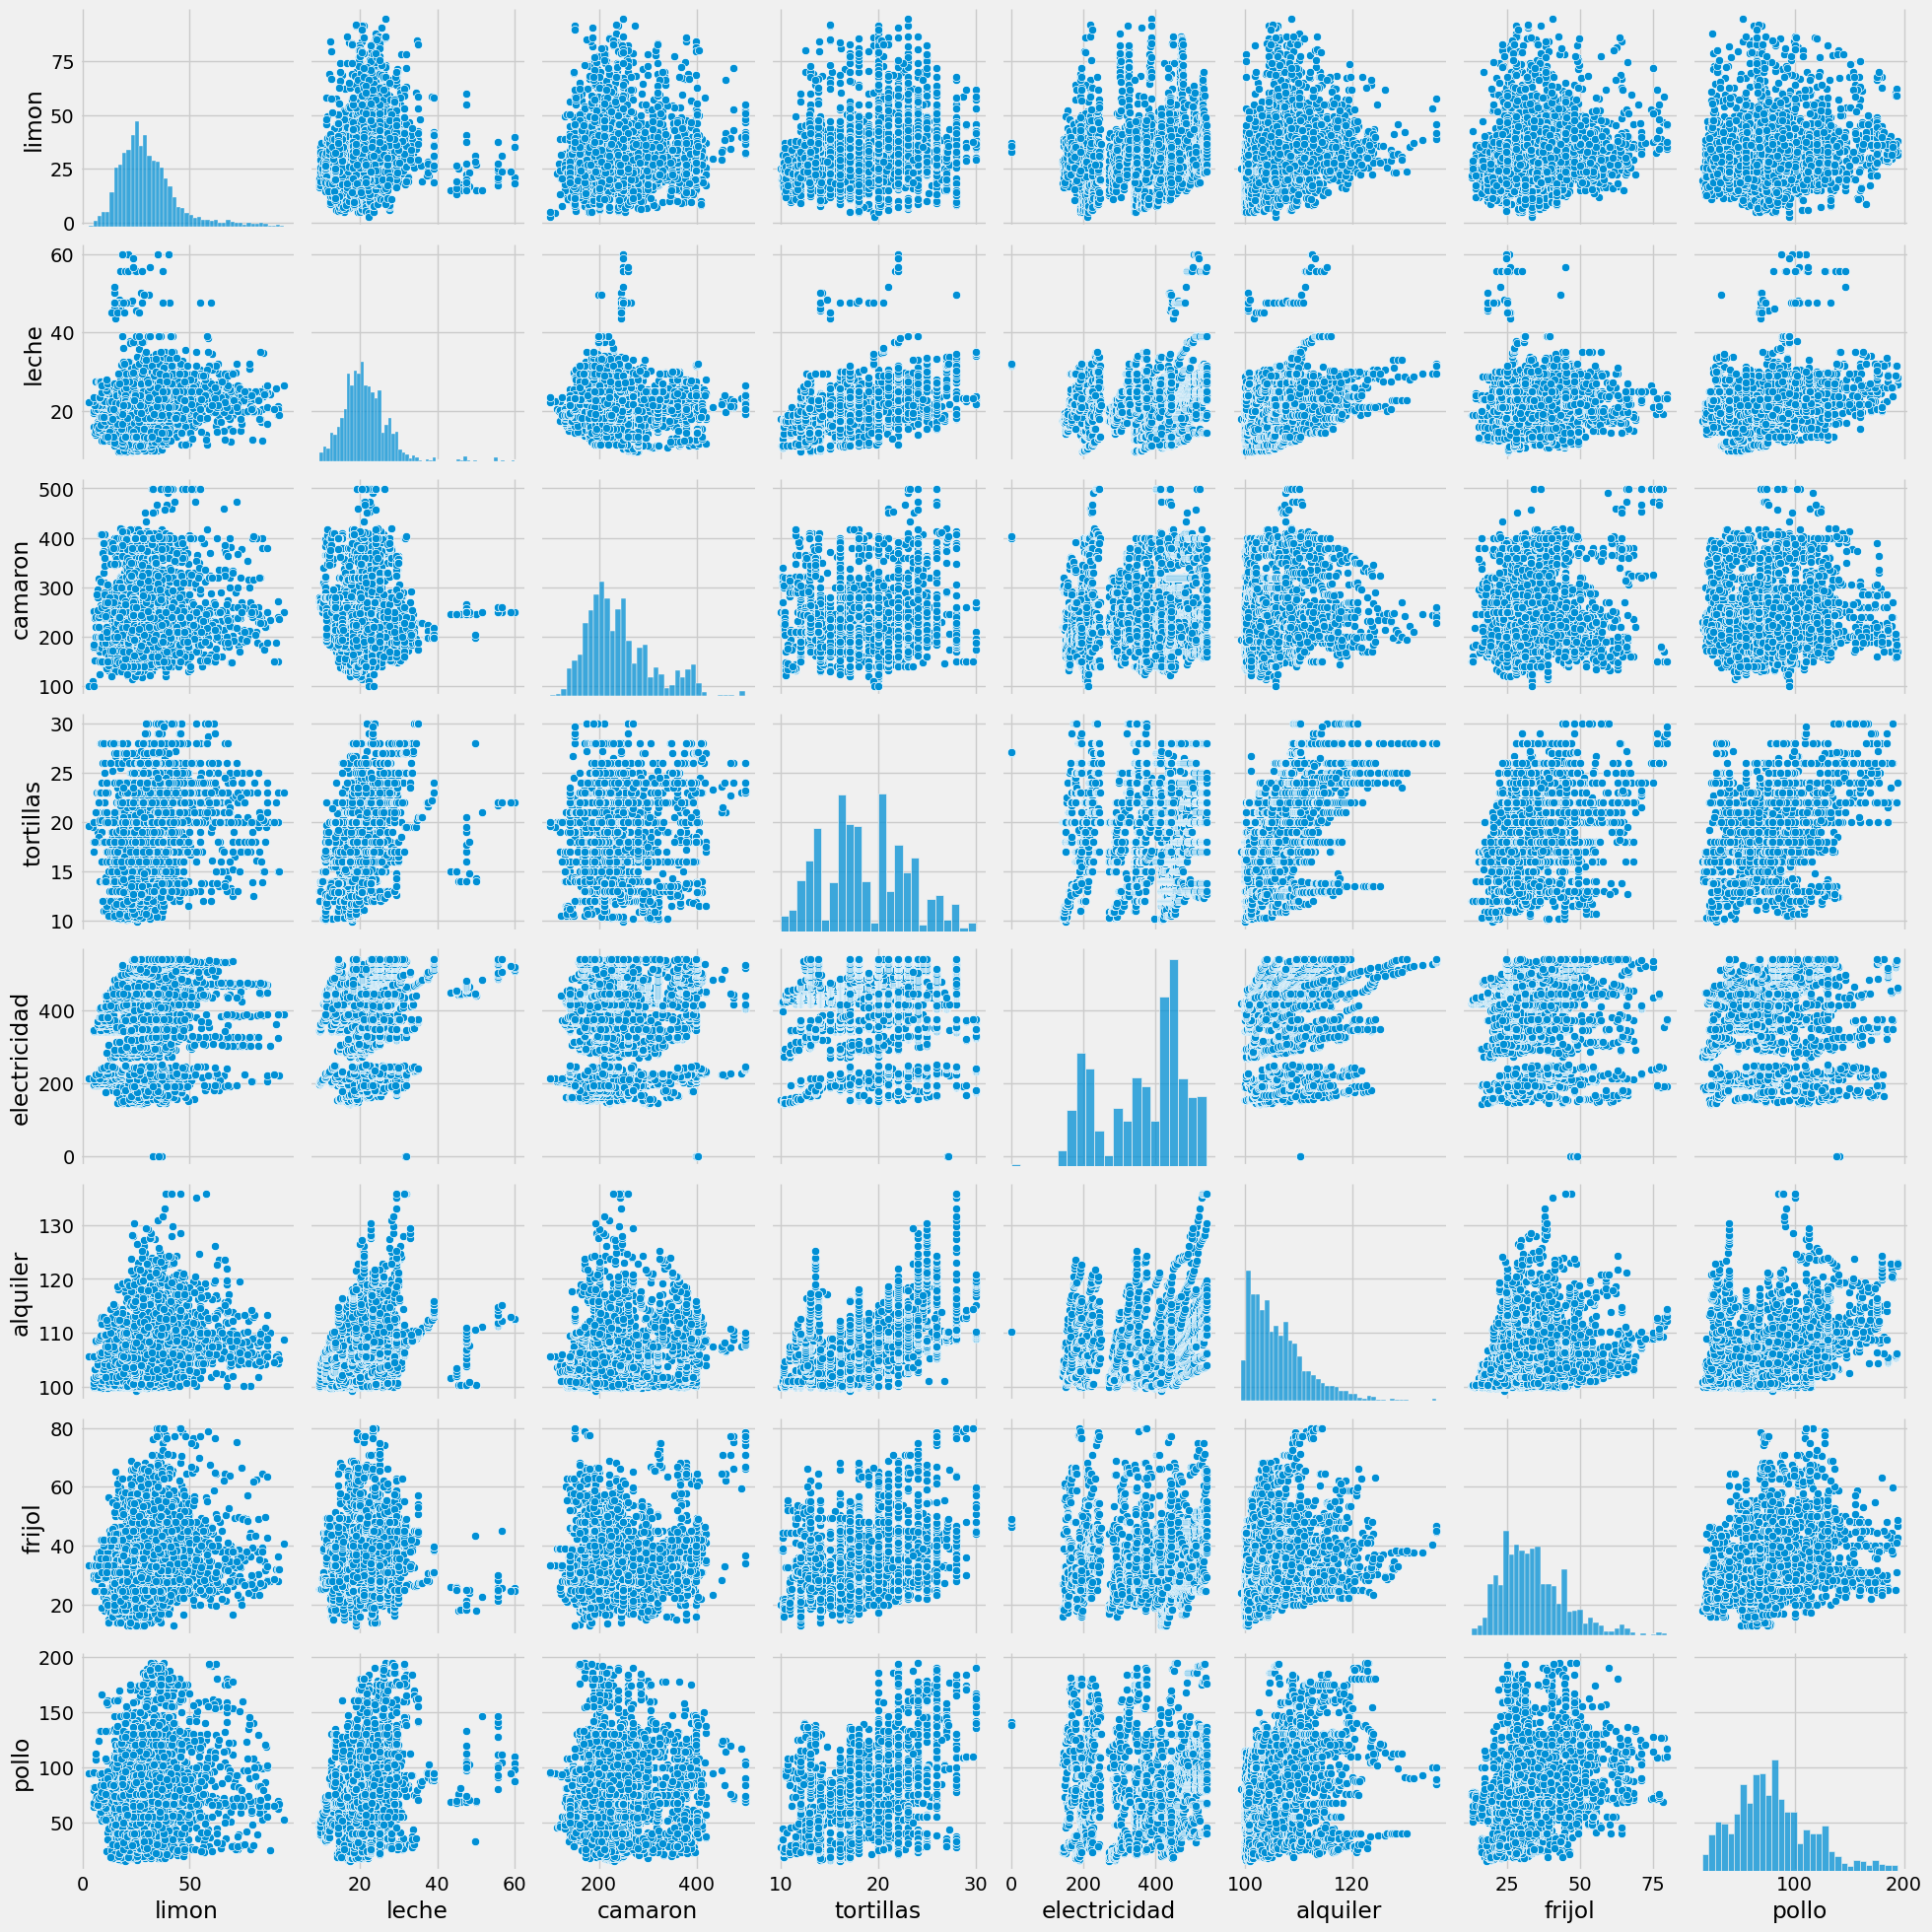

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



/Users/ely/Documents/Maestria/segundo_semestre/cimat2023-1/patrones/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


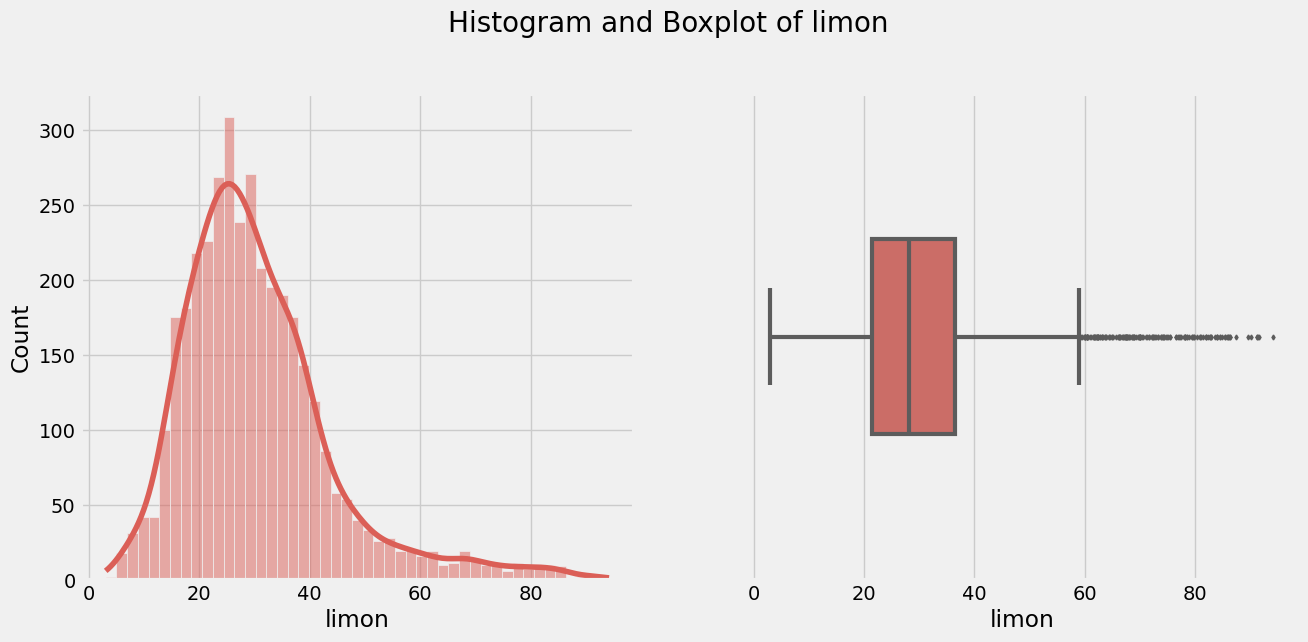

/Users/ely/Documents/Maestria/segundo_semestre/cimat2023-1/patrones/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


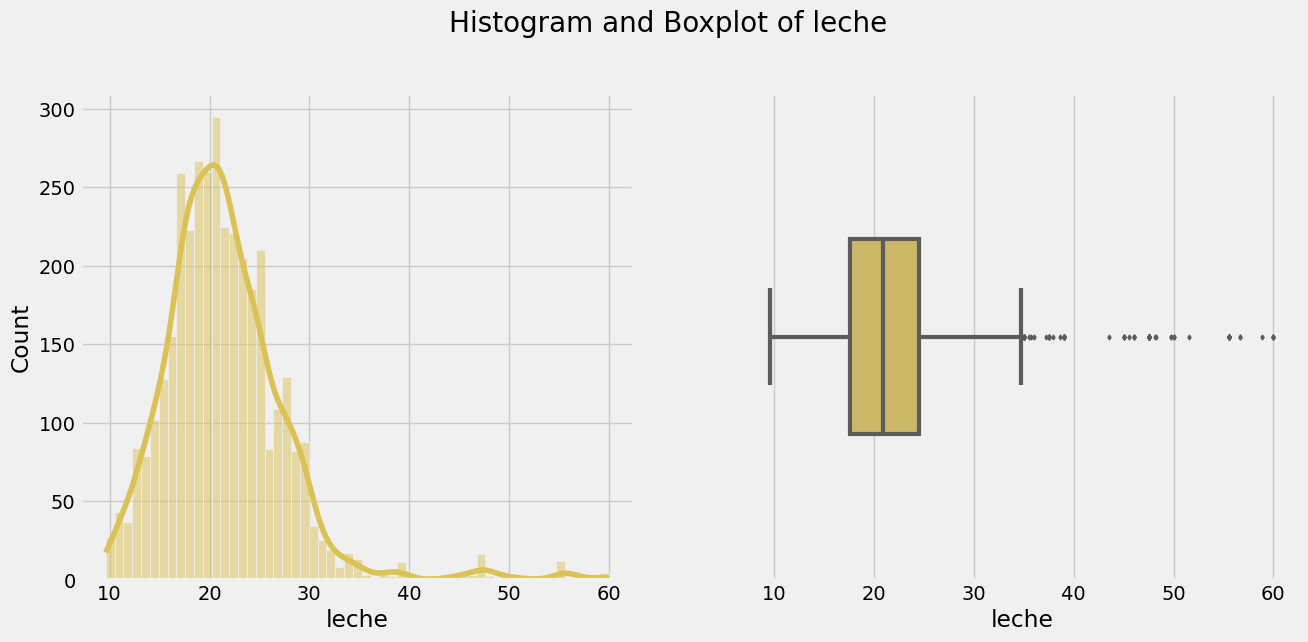

/Users/ely/Documents/Maestria/segundo_semestre/cimat2023-1/patrones/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


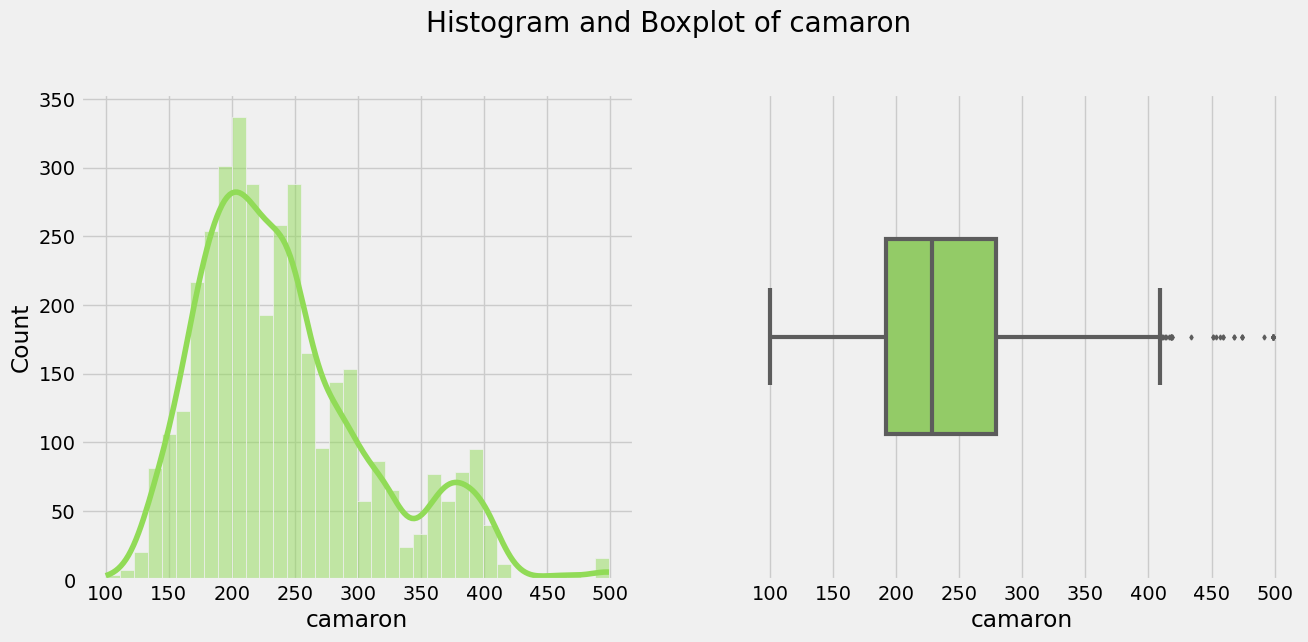

/Users/ely/Documents/Maestria/segundo_semestre/cimat2023-1/patrones/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


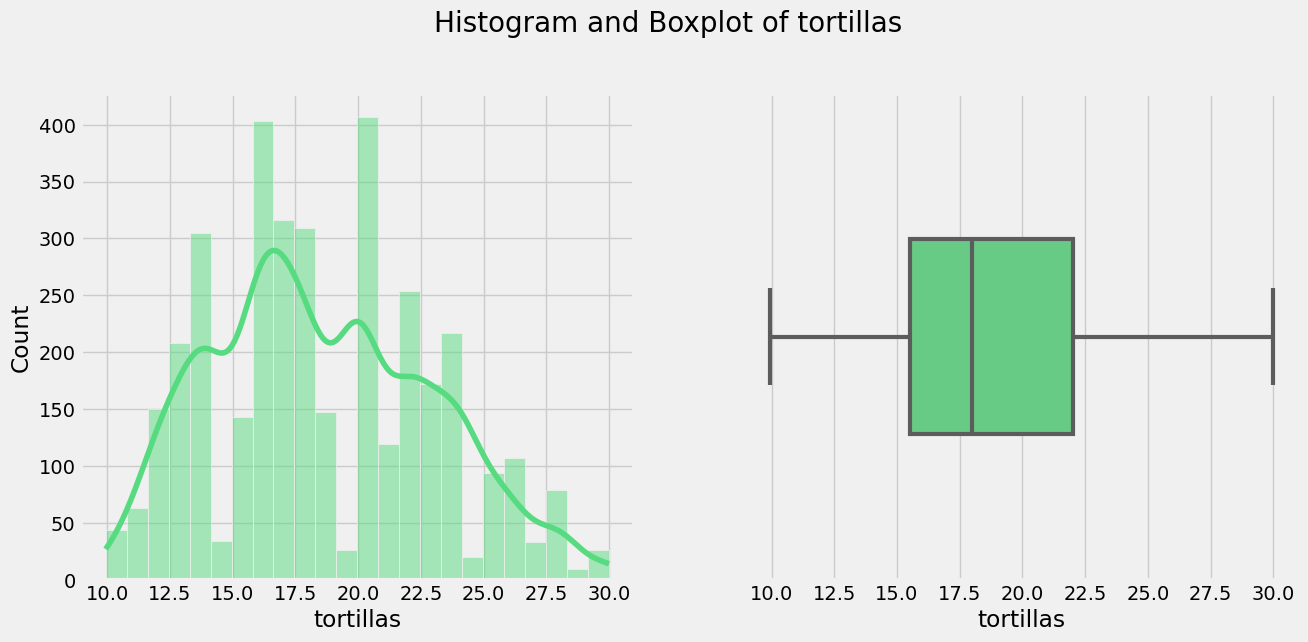

/Users/ely/Documents/Maestria/segundo_semestre/cimat2023-1/patrones/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


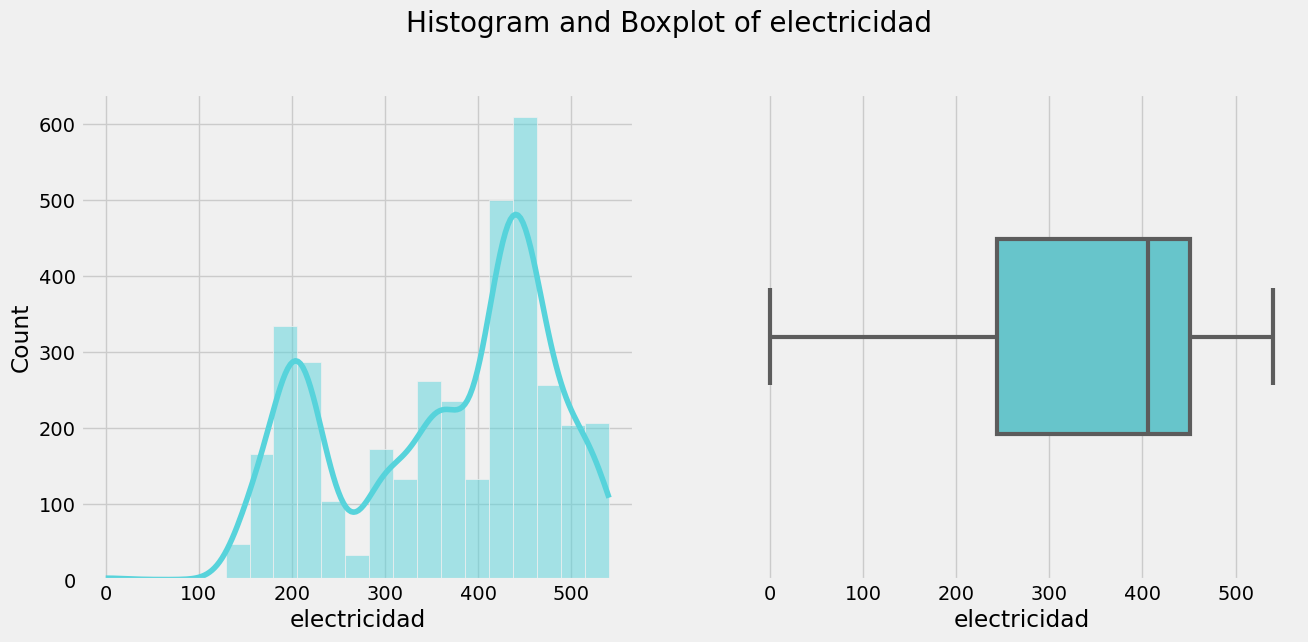

/Users/ely/Documents/Maestria/segundo_semestre/cimat2023-1/patrones/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


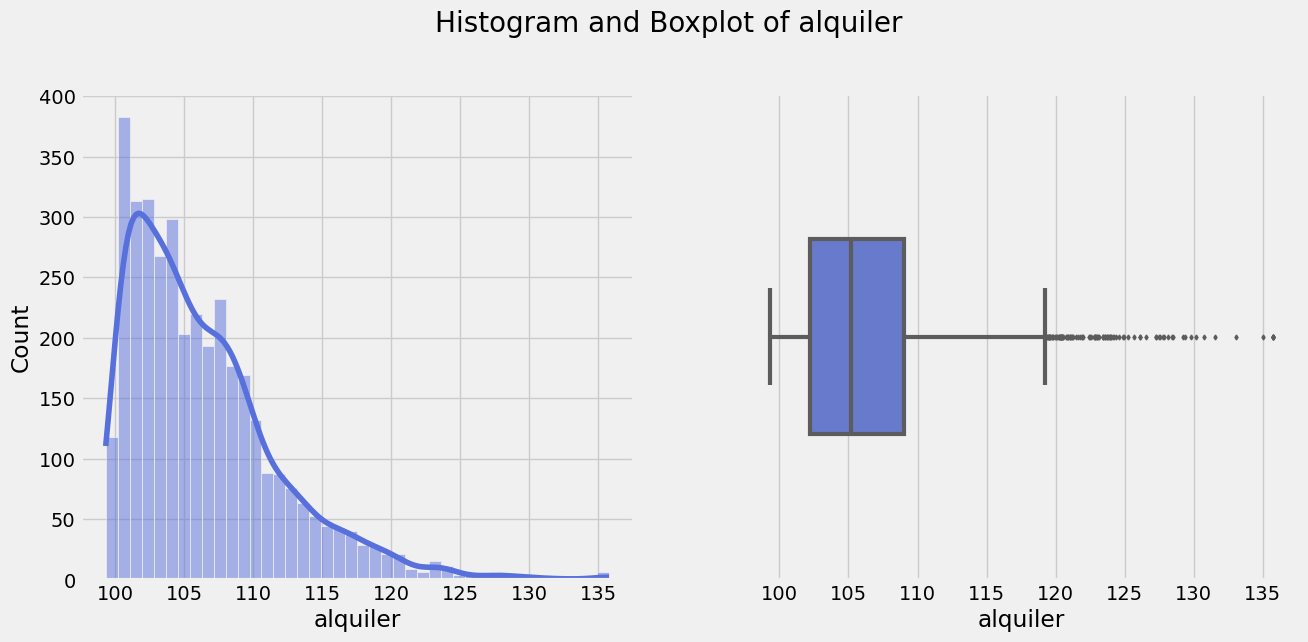

/Users/ely/Documents/Maestria/segundo_semestre/cimat2023-1/patrones/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


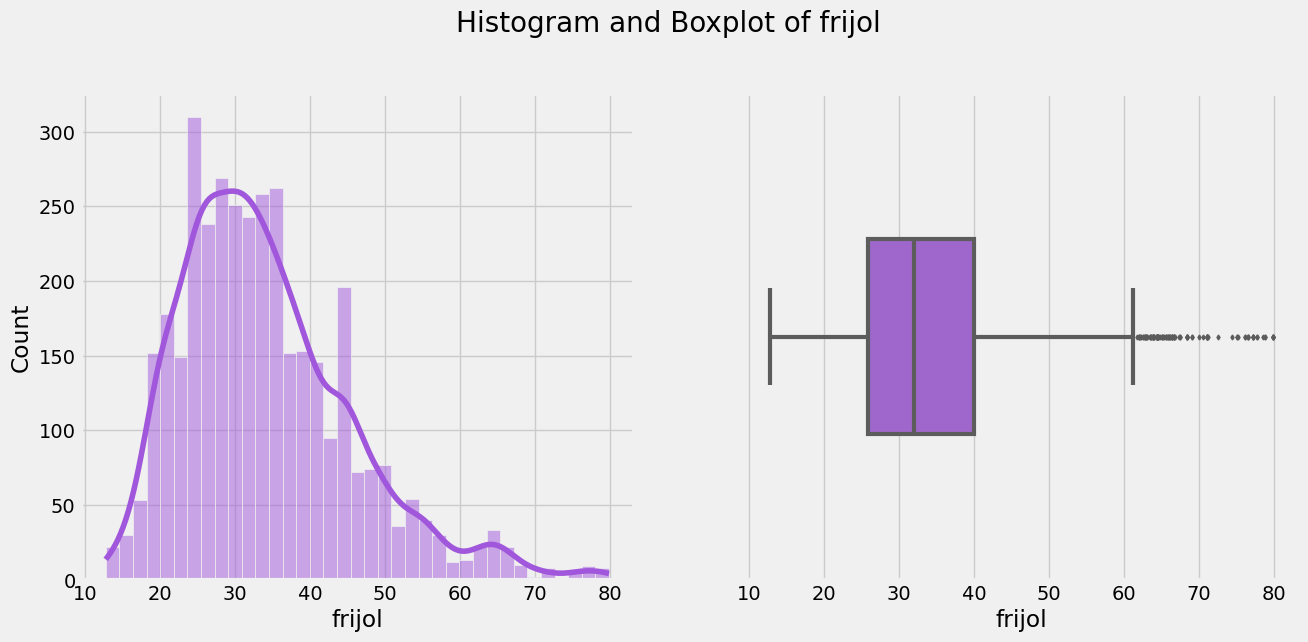

/Users/ely/Documents/Maestria/segundo_semestre/cimat2023-1/patrones/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


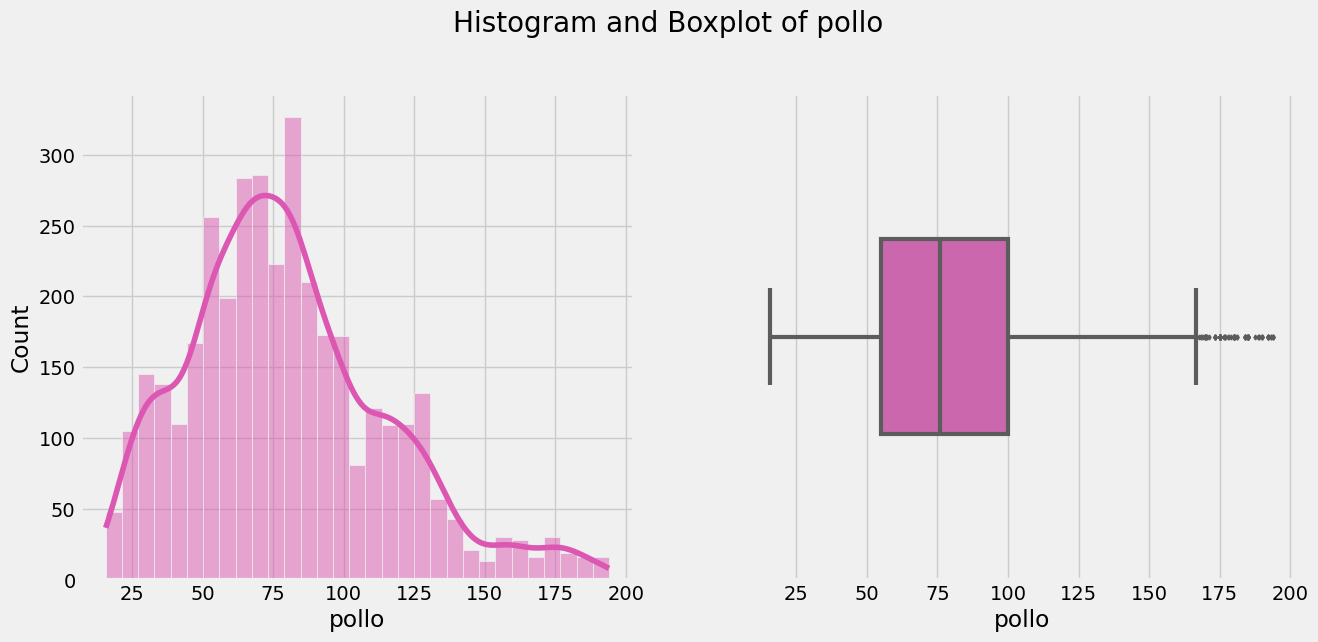

In [57]:
df_products_only=df[["limon",	"leche"	,"camaron"	,"tortillas"	,"electricidad"	,"alquiler"	,"frijol"	,"pollo"]]

fast_eda(df_products_only)

<Figure size 1200x800 with 0 Axes>

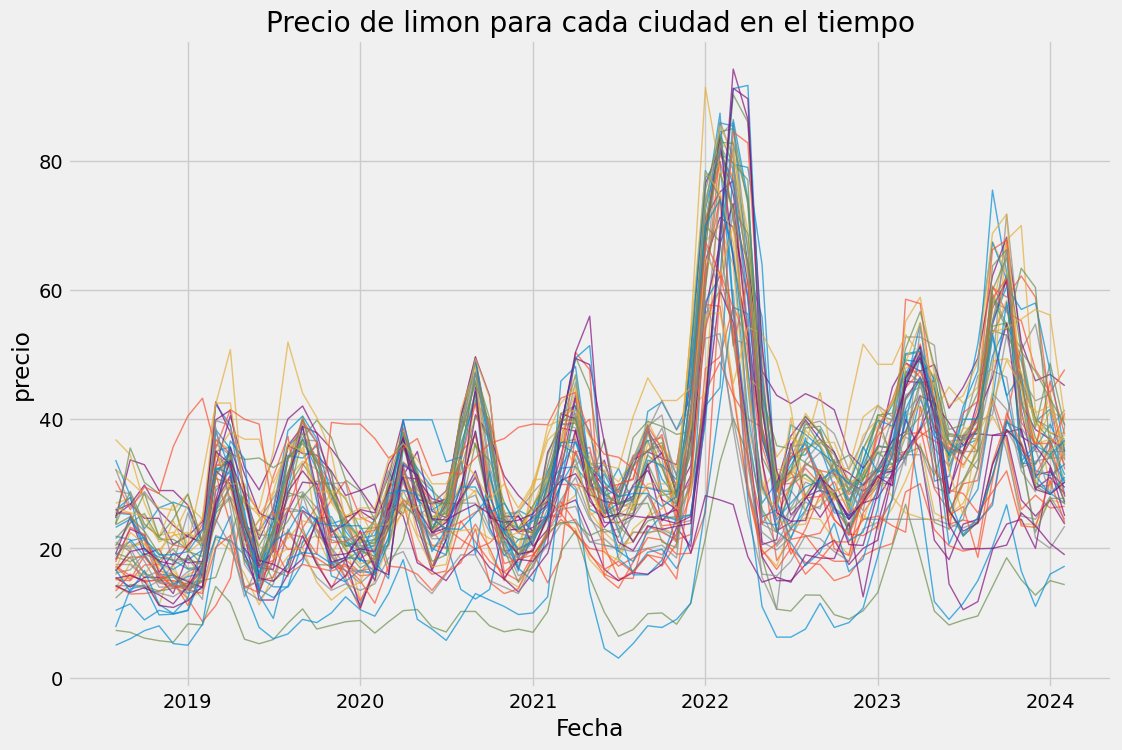

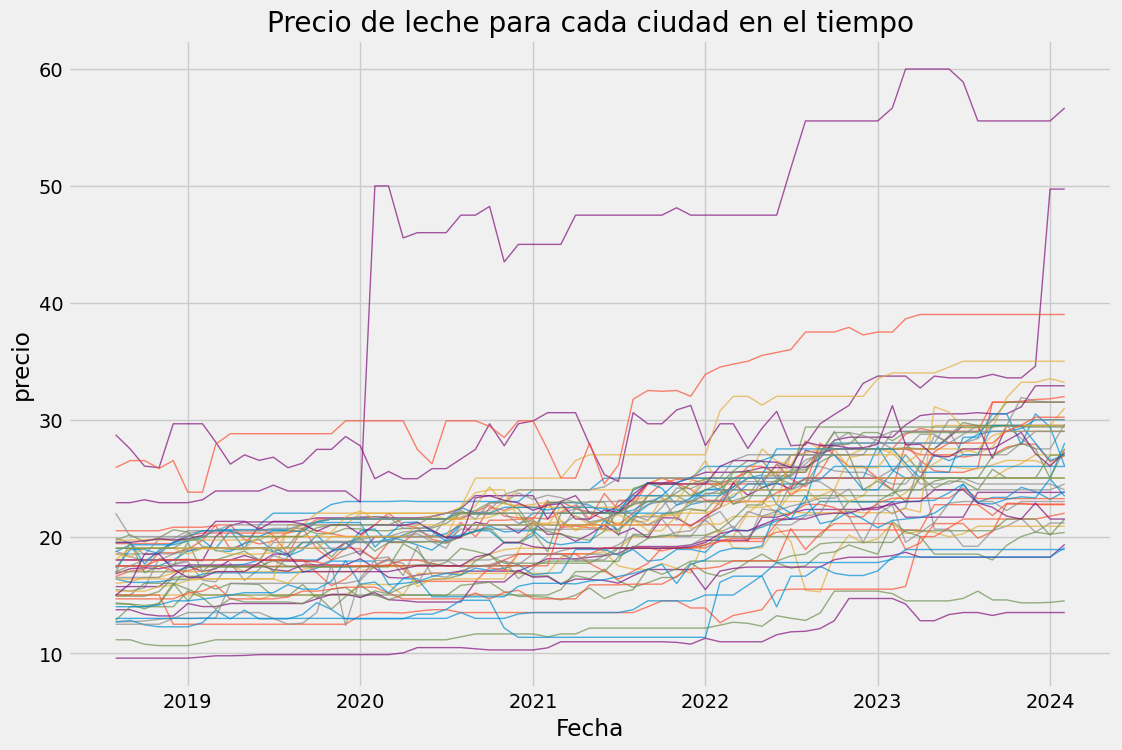

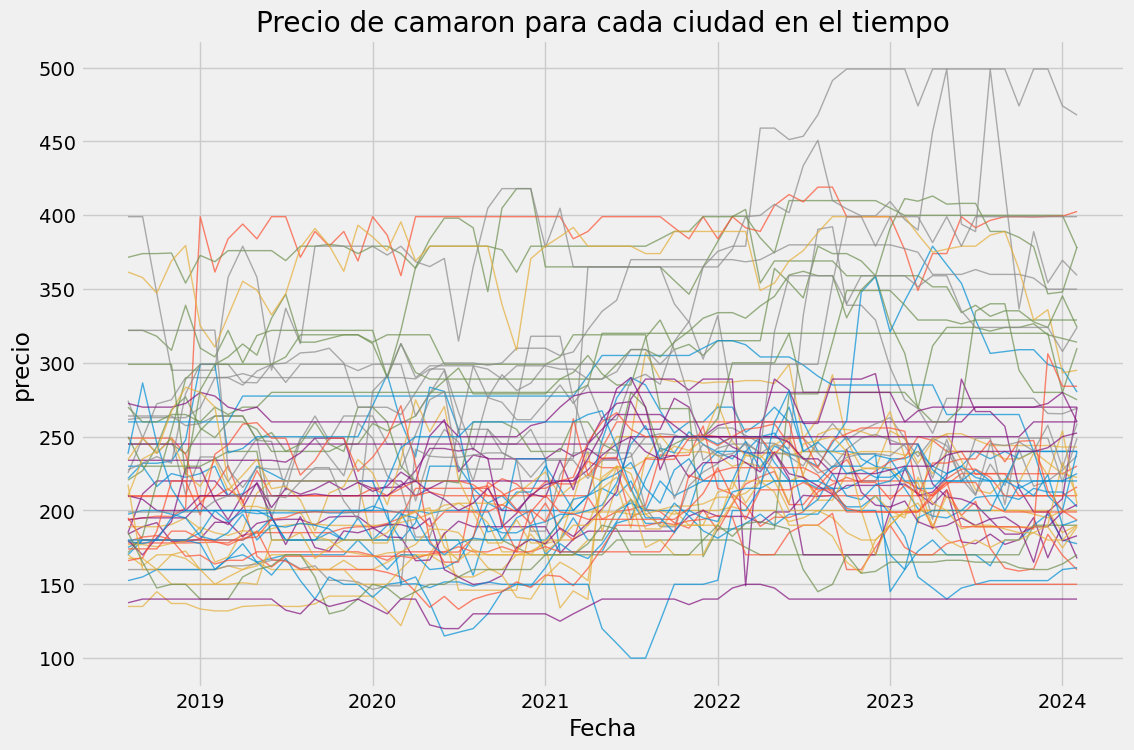

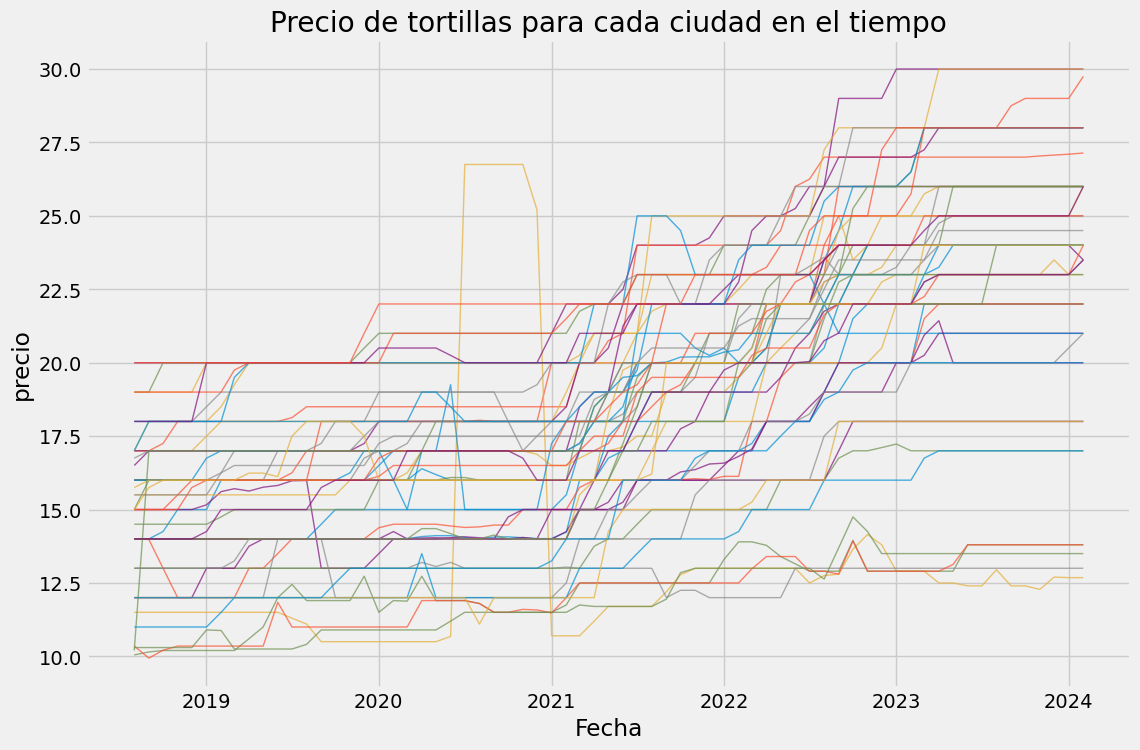

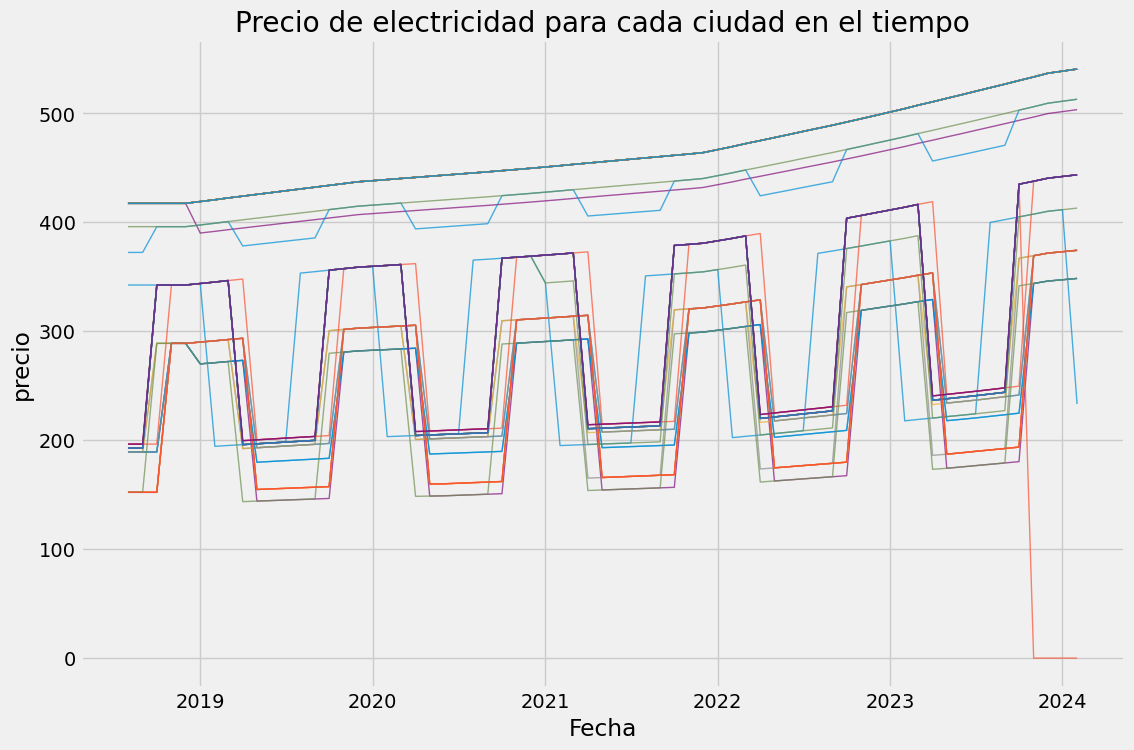

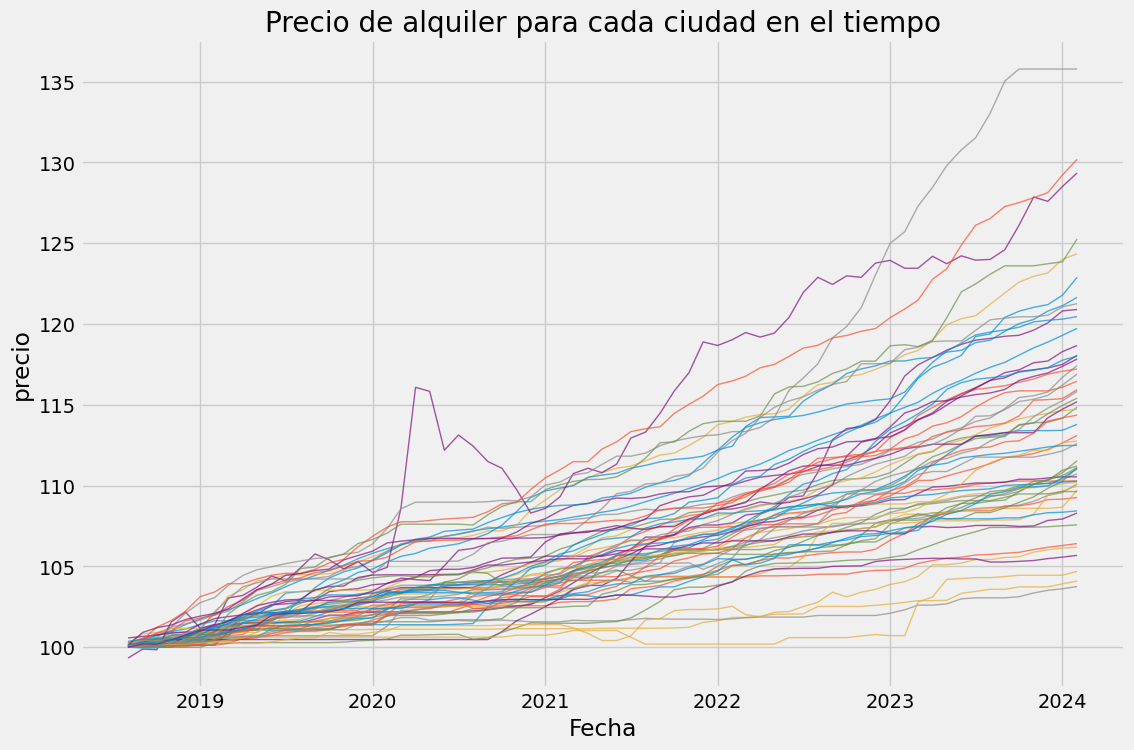

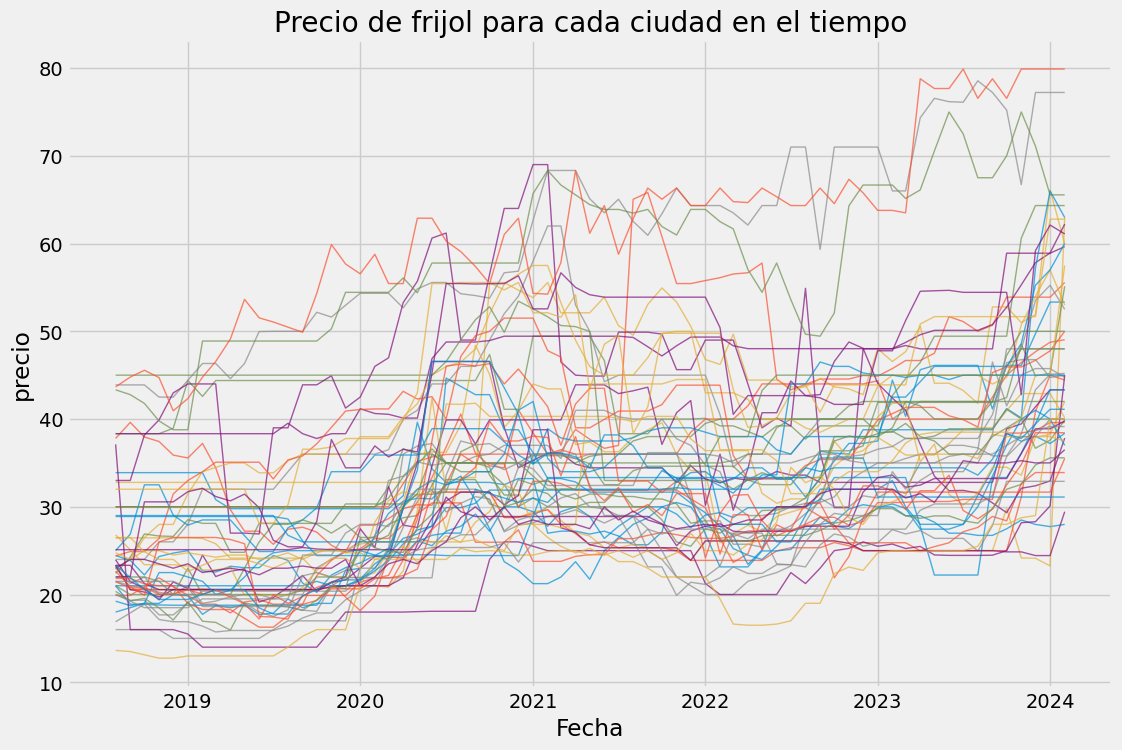

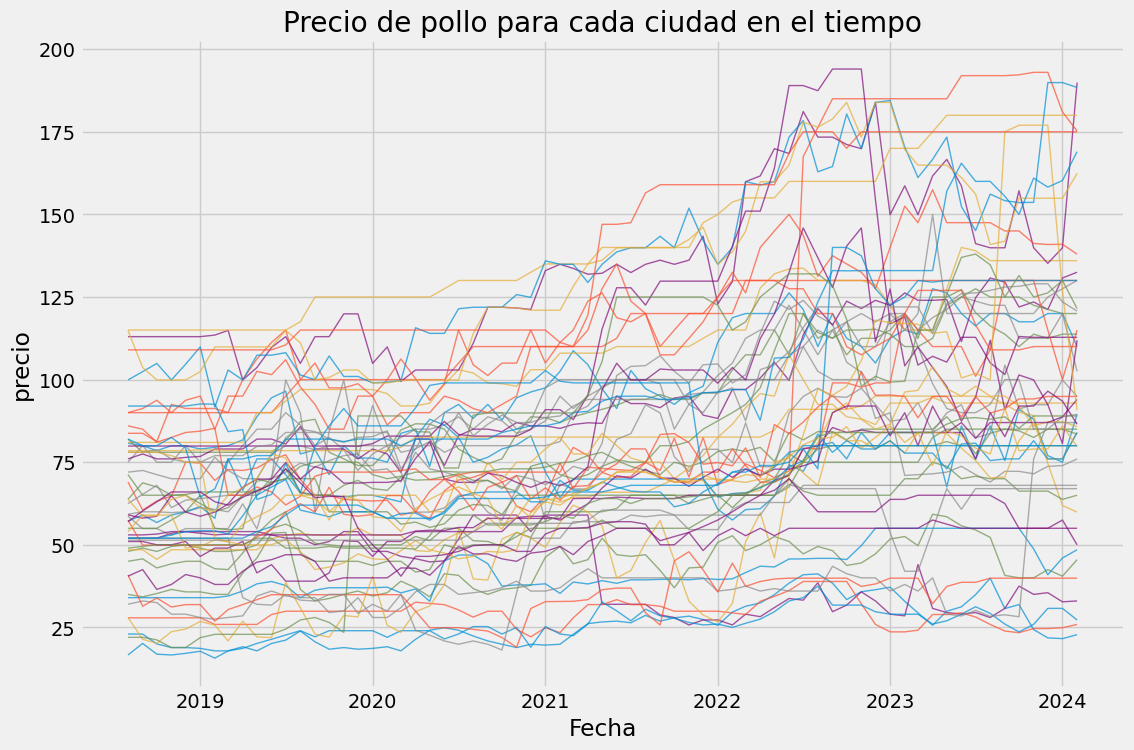

In [59]:
#obtenemos la clave las ciudades
ciudades = df['Clave ciudad'].unique()
df['Fecha'] = pd.to_datetime(df['Anio'].astype(str) + '-' + df['Mes'].astype(str) + '-01')
#los productos que vamos a graficar
productos = ['limon', 'leche', 'camaron', 'tortillas', 'electricidad', 'alquiler', 'frijol', 'pollo']

# Configuración común para el gráfico
plt.figure(figsize=(12, 8))

# Iterar sobre cada elemento
for producto in productos:
    plt.figure(figsize=(12, 8))
    for ciudad in ciudades:
        ciudad_df = df[df['Clave ciudad'] == ciudad]
        plt.plot(ciudad_df['Fecha'], ciudad_df[producto], label=ciudad, alpha=0.7, linewidth=1)
    
    plt.title(f'Precio de {producto} para cada ciudad en el tiempo')
    plt.xlabel('Fecha')
    plt.ylabel('precio')  # Ajusta la etiqueta del eje y para que coincida con el elemento
    plt.show()


In [60]:
df['suma'] = df[["limon", "leche", "camaron", "tortillas", "electricidad", "alquiler", "frijol", "pollo"]].sum(axis=1)
df_cds=df[["Clave ciudad",'suma']]


#Calculamos el precio promedio de la suma de todos los productos para cada ciudad
precio_promedio = df_cds.groupby('Clave ciudad').mean()

#definimos una fun para asignar la categoría según el precio promedio
def asignar_categoria(precio):
    umbral_superior = precio_promedio['suma'].quantile(2/3)
    umbral_inferior = precio_promedio['suma'].quantile(1/3)
    if precio >= umbral_superior:
        return 'Caro'
    elif precio <= umbral_inferior:
        return 'Barato'
    else:
        return 'Medio'

#asignamos la categoria a cada ciudad
precio_promedio['Categoria'] = precio_promedio['suma'].apply(asignar_categoria)



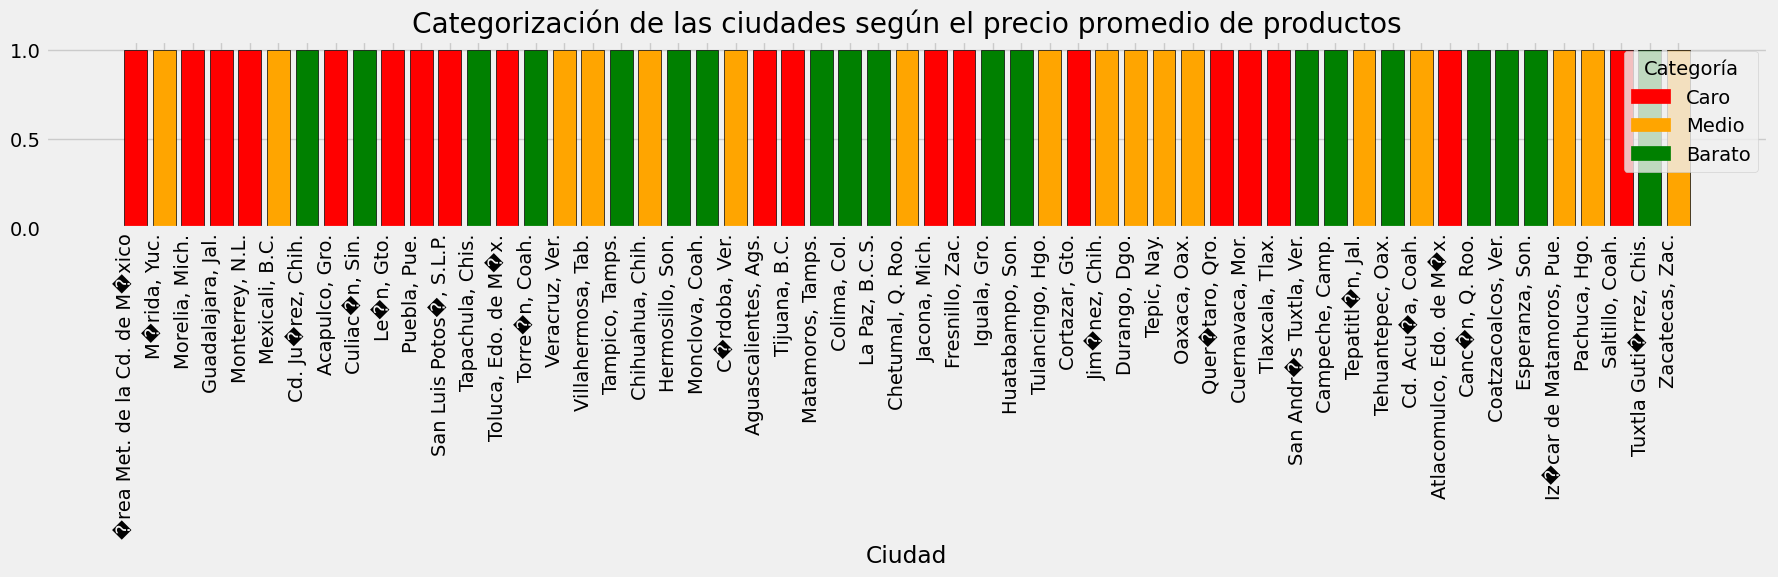

In [63]:
# Graficar
plt.figure(figsize=(18, 6))

#categorías por color
colores = {'Caro': 'red', 'Medio': 'orange', 'Barato': 'green'}

# barras para cada ciudad con el color de su categoria
for clave_ciudad, precio in precio_promedio.iterrows():
    ciudad = diccionario_ciudades[clave_ciudad]
    categoria = precio['Categoria']
    plt.bar(ciudad, 1, color=colores[categoria], edgecolor='black')

handles = [plt.Rectangle((0,0),1,1, color=colores[categoria]) for categoria in colores]
plt.legend(handles, list(colores.keys()), title='Categoría')
#nombre de cada ciudad
plt.xticks(rotation=90, ha='right')
plt.title('Categorización de las ciudades según el precio promedio de productos')
plt.xlabel('Ciudad')
plt.tight_layout()
plt.show()



In [76]:
#Creamos un diccionario que mapee cada ciudad a su respectiva categoría
diccionario_categorias = precio_promedio['Categoria'].to_dict()

# Creamos un diccionario que mapee cada categoría a su respectivo número
diccionario_categorias_numeros = {'Caro': 1, 'Medio': 2, 'Barato': 3}

# Agregamos la nueva columna 'categoria' al DataFrame df usando el diccionario de categorías
df['categoria'] = df['Clave ciudad'].map(diccionario_categorias).map(diccionario_categorias_numeros)

df.head()

Anio  Mes  Clave ciudad  limon  leche  camaron  tortillas  electricidad  \
0  2018    8             1  33.68  19.00   175.00      14.00        417.35   
1  2018    8             2  14.23  16.58   178.00      16.00        192.79   
2  2018    8             3  13.75  16.00   135.00      11.50        417.35   
3  2018    8             4  20.40  11.17   322.00      10.05        417.35   
4  2018    8             5  20.68  15.47   225.48      16.00        192.79   

   alquiler  frijol  pollo      Fecha    suma  categoria  Season  
0    100.24   33.89  80.75 2018-08-01  873.91          1       3  
1    100.03   37.79  90.00 2018-08-01  645.42          2       3  
2    100.08   32.78  81.00 2018-08-01  807.46          1       3  
3    100.24   38.33  35.00 2018-08-01  954.54          1       3  
4    100.16   43.89  59.24 2018-08-01  673.71          1       3

In [73]:
# Creamos un diccionario de mapeo de meses a estaciones
season_mapping = {
    1: 1, #invierno
    2: 1,
    3: 2, #primavera
    4: 2,
    5: 2,
    6: 3, #verano
    7: 3,
    8: 3,
    9: 4, #otoño
    10: 4,
    11: 4,
    12: 1
}

# Agregamos la columna 'Season' a nuestra base
df['Season'] = df['Mes'].map(season_mapping)




In [74]:
df

Anio  Mes  Clave ciudad  limon  leche  camaron  tortillas  electricidad  \
0     2018    8             1  33.68  19.00   175.00      14.00        417.35   
1     2018    8             2  14.23  16.58   178.00      16.00        192.79   
2     2018    8             3  13.75  16.00   135.00      11.50        417.35   
3     2018    8             4  20.40  11.17   322.00      10.05        417.35   
4     2018    8             5  20.68  15.47   225.48      16.00        192.79   
...    ...  ...           ...    ...    ...      ...        ...           ...   
3680  2024    2            51  37.50  25.00   190.00      18.00        540.59   
3681  2024    2            52  39.15  27.50   170.00      23.00        540.59   
3682  2024    2            53  35.00  23.00   324.00      24.50        540.59   
3683  2024    2            54  19.00  21.50   140.00      23.50        443.56   
3684  2024    2            55  36.75  18.89   225.00      20.00        540.59   

      alquiler  frijol  pollo      Fecha     suma categoria  Season  
0       100.24   33.89  80.75 2018-08-01   873.91      Caro       3  
1       100.03   37.79  90.00 2018-08-01   645.42     Medio       3  
2       100.08   32.78  81.00 2018-08-01   807.46      Caro       3  
3       100.24   38.33  35.00 2018-08-01   954.54      Caro       3  
4       100.16   43.89  59.24 2018-08-01   673.71      Caro       3  
...        ...     ...    ...        ...      ...       ...     ...  
3680    106.18   40.00  79.75 2024-02-01  1037.02     Medio       1  
3681    111.11   48.00  89.00 2024-02-01  1048.35     Medio       1  
3682    116.90   39.14  68.00 2024-02-01  1171.13      Caro       1  
3683    105.68   36.50  50.00 2024-02-01   839.74    Barato       1  
3684    111.03   43.33  80.00 2024-02-01  1075.59     Medio       1  

[3685 rows x 15 columns]

In [77]:
#Exportamos el dataframe a un archivo CSV
df.to_csv(carpeta+'base.csv', index=False)